In [1]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

from model import RetinoblastomaClassifierCNN
from model_non_binary import RetinoblastomaClassifierNonBinaryCNN

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
import random

In [3]:
transformer = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [4]:
dataset = datasets.ImageFolder(root="processed_dataset/training/", transform=transformer)
val_dataset = datasets.ImageFolder(root="processed_dataset/validation/", transform=transformer)

total_size = len(dataset)
train_size = int(0.9 * total_size)

test_size = total_size - train_size 

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=12, shuffle=False)

In [5]:
dataset.class_to_idx

{'healthy': 0, 'retinoblastoma': 1}

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
device

device(type='cuda')

In [8]:
def model_train(model, optimizer, criterion, dataloader):
    model.train()
    actual = []
    predicted = []

    
    for batch in dataloader:
        images, labels = batch
        labels = labels.to(device)
        images = images.to(device)
        
        preds = model(images) 
        loss = criterion(preds, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted_classes = torch.max(preds, 1)
        
        for label in labels.tolist(): actual.append(int(label))
        for predicted_class in predicted_classes.tolist(): predicted.append(int(predicted_class))
    
    actual = np.array(actual) 
    predicted = np.array(predicted)
    
    return actual, predicted

In [9]:
def model_eval(model,dataloader):
    model.eval()
    actual = []
    predicted = []
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            
            labels = labels.to(device)
            images = images.to(device)
            
            preds = model(images)
            #loss = criterion(preds, labels)
            
            _, predicted_classes = torch.max(preds, 1)
            
            for label in labels.tolist(): actual.append(int(label))
            for predicted_class in predicted_classes.tolist(): predicted.append(int(predicted_class)) 
        
    actual = np.array(actual) 
    predicted = np.array(predicted)
    
    return actual, predicted

In [10]:
def create_confusion_matrix(actual,predicted, epoch):
    
    cm = confusion_matrix(actual,predicted)
    
    sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Healthy','Retinoblastoma'],
            yticklabels=['Healthy','Retinoblastoma'])
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Eval Confusion Matrix - Epoch #{epoch+1}', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

In [11]:
model = RetinoblastomaClassifierNonBinaryCNN().to(device) 

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [12]:
model_name = "retinoblastoma_model_1"

In [13]:
f = open("../info/logs/retinoblastoma/" + model_name + ".txt", "w")

Epoch #1
Training: 
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       190
           1       0.60      0.57      0.58       168

    accuracy                           0.62       358
   macro avg       0.62      0.62      0.62       358
weighted avg       0.62      0.62      0.62       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        24
           1       1.00      0.12      0.22        16

    accuracy                           0.65        40
   macro avg       0.82      0.56      0.50        40
weighted avg       0.78      0.65      0.55        40



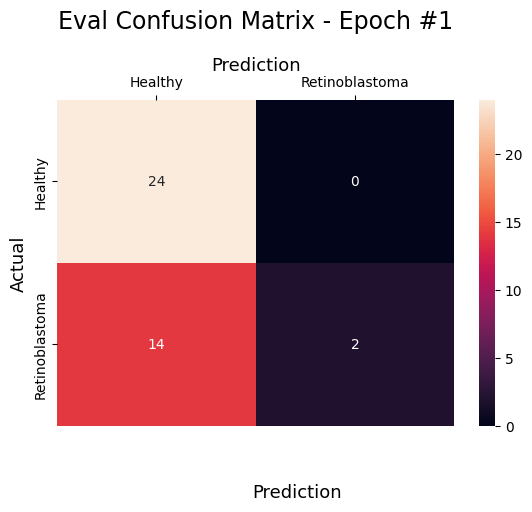

Epoch #2
Training: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       190
           1       0.82      0.85      0.84       168

    accuracy                           0.84       358
   macro avg       0.84      0.84      0.84       358
weighted avg       0.84      0.84      0.84       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.63      0.75      0.69        16

    accuracy                           0.72        40
   macro avg       0.72      0.73      0.72        40
weighted avg       0.74      0.72      0.73        40



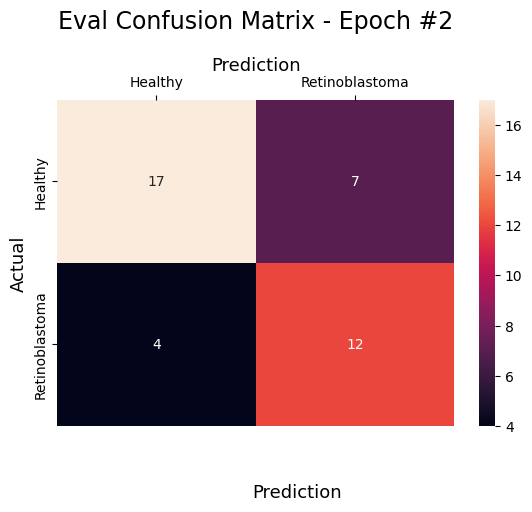

Epoch #3
Training: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       190
           1       0.93      0.96      0.94       168

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.78      0.88      0.82        16

    accuracy                           0.85        40
   macro avg       0.84      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



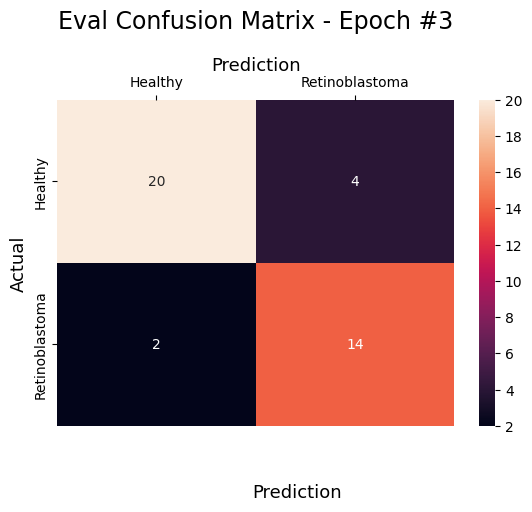

Epoch #4
Training: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       190
           1       0.98      0.97      0.98       168

    accuracy                           0.98       358
   macro avg       0.98      0.98      0.98       358
weighted avg       0.98      0.98      0.98       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.93      0.81      0.87        16

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



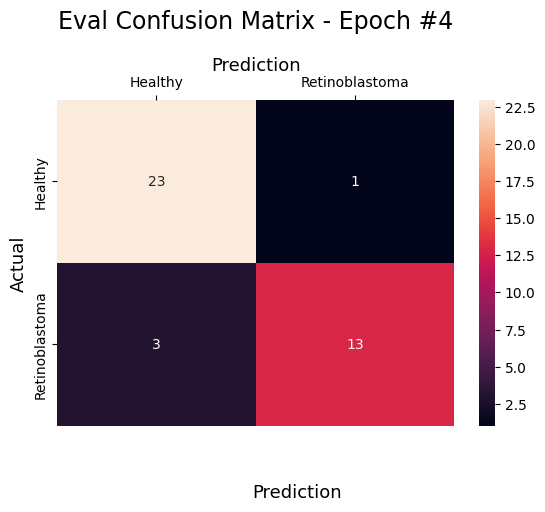

Epoch #5
Training: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       190
           1       0.98      0.97      0.97       168

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       0.59      1.00      0.74        16

    accuracy                           0.72        40
   macro avg       0.80      0.77      0.72        40
weighted avg       0.84      0.72      0.72        40



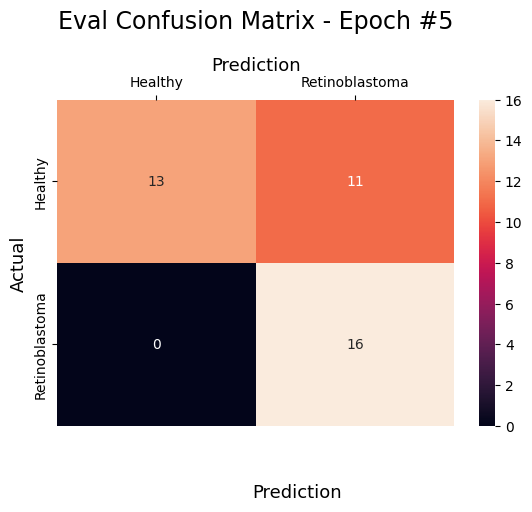

Epoch #6
Training: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       190
           1       0.98      1.00      0.99       168

    accuracy                           0.99       358
   macro avg       0.99      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.82      0.88      0.85        16

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



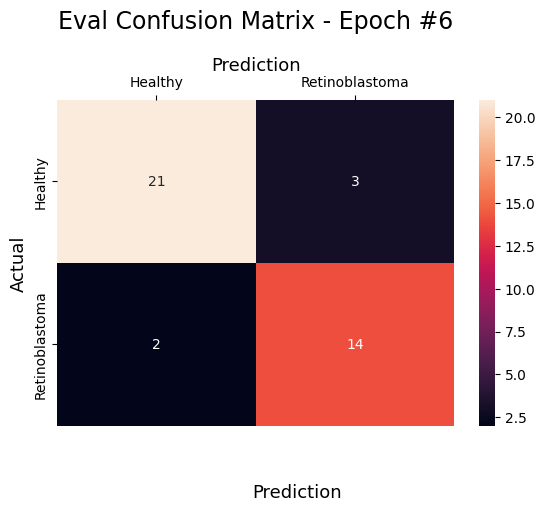

Epoch #7
Training: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.96      0.95      0.96       168

    accuracy                           0.96       358
   macro avg       0.96      0.96      0.96       358
weighted avg       0.96      0.96      0.96       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.57      1.00      0.73        16

    accuracy                           0.70        40
   macro avg       0.79      0.75      0.70        40
weighted avg       0.83      0.70      0.69        40



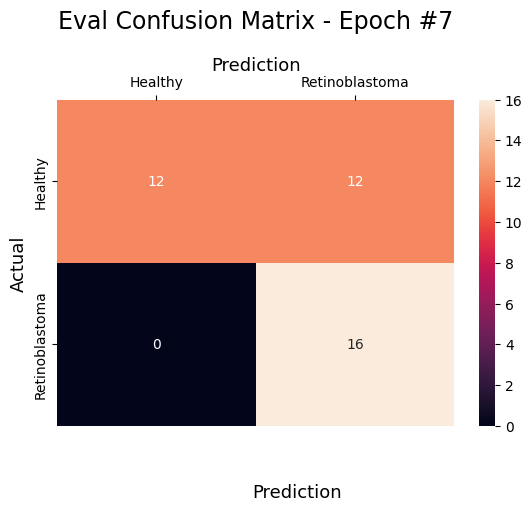

Epoch #8
Training: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       190
           1       0.94      0.95      0.95       168

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.95      0.95      0.95       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       0.73      1.00      0.84        16

    accuracy                           0.85        40
   macro avg       0.86      0.88      0.85        40
weighted avg       0.89      0.85      0.85        40



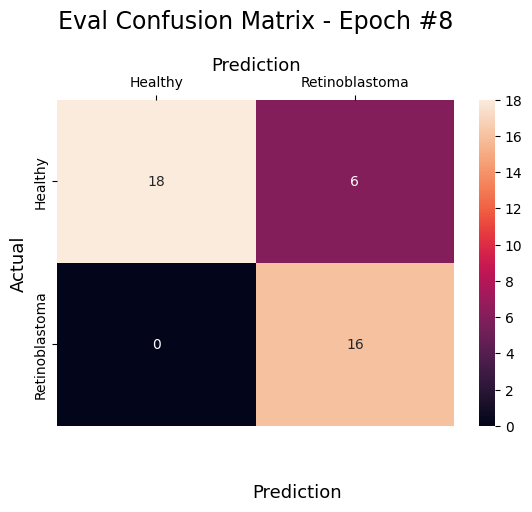

Epoch #9
Training: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       190
           1       0.96      0.97      0.96       168

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.53      1.00      0.70        16

    accuracy                           0.65        40
   macro avg       0.77      0.71      0.64        40
weighted avg       0.81      0.65      0.63        40



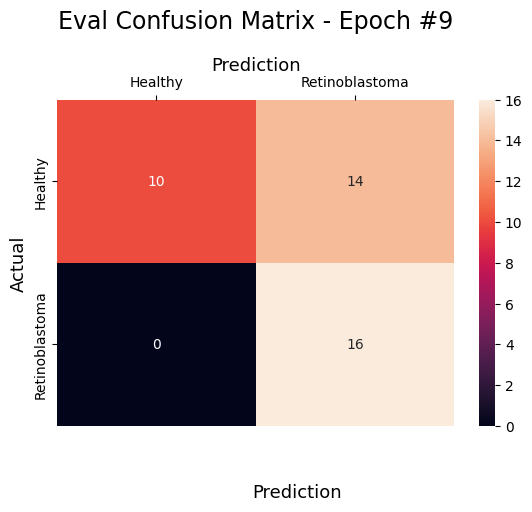

Epoch #10
Training: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       190
           1       0.91      0.90      0.90       168

    accuracy                           0.91       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.91      0.91      0.91       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.82      0.88      0.85        16

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



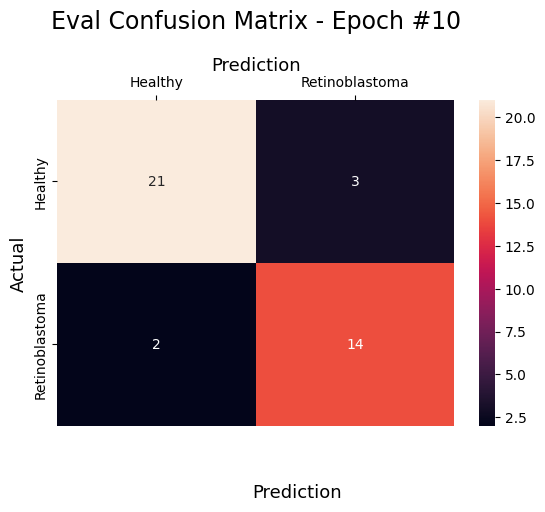

Epoch #11
Training: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       190
           1       0.93      0.94      0.93       168

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



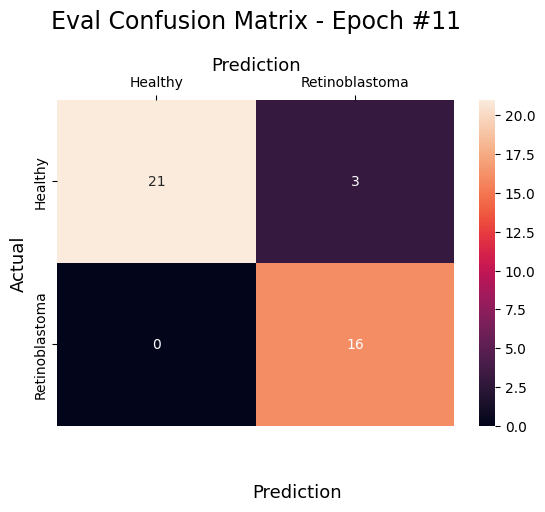

Epoch #12
Training: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       190
           1       0.97      0.97      0.97       168

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.83      0.94      0.88        16

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



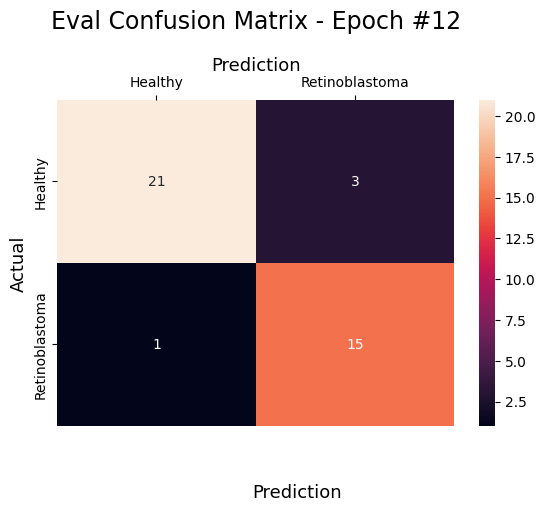

Epoch #13
Training: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       0.99      0.99      0.99       168

    accuracy                           0.99       358
   macro avg       0.99      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.70      1.00      0.82        16

    accuracy                           0.82        40
   macro avg       0.85      0.85      0.82        40
weighted avg       0.88      0.82      0.83        40



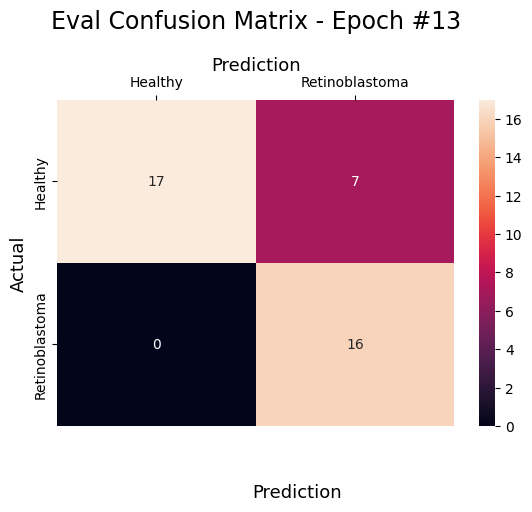

Epoch #14
Training: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       190
           1       1.00      0.99      0.99       168

    accuracy                           0.99       358
   macro avg       0.99      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358

Evaluation: 
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.79      0.94      0.86        16

    accuracy                           0.88        40
   macro avg       0.87      0.89      0.87        40
weighted avg       0.89      0.88      0.88        40



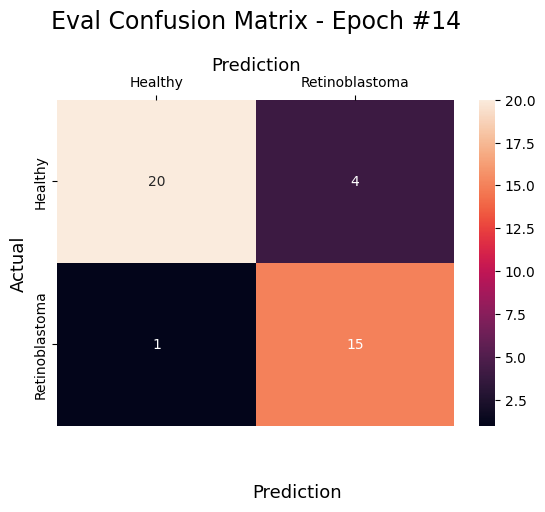

Epoch #15
Training: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       190
           1       0.99      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



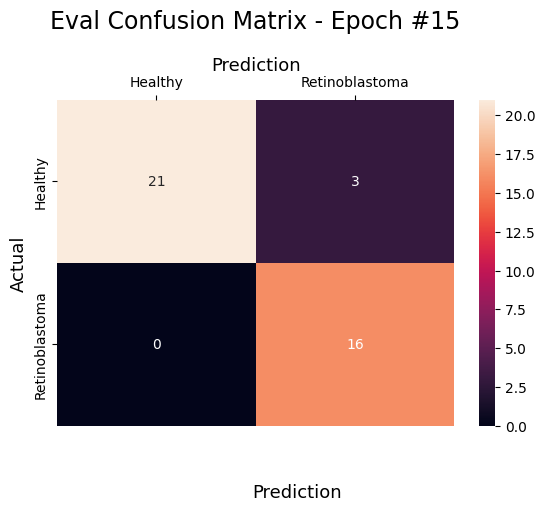

Epoch #16
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



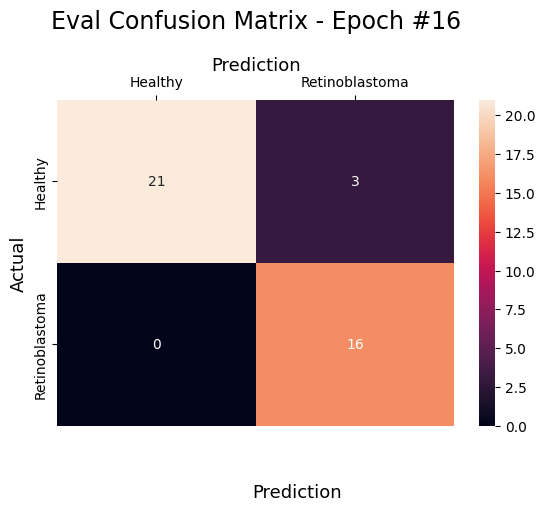

Epoch #17
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



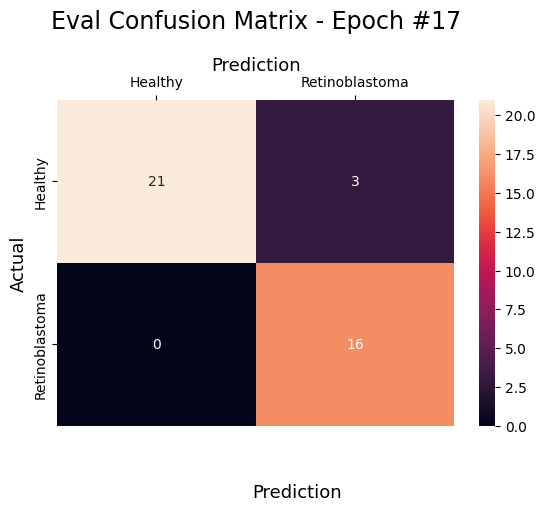

Epoch #18
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



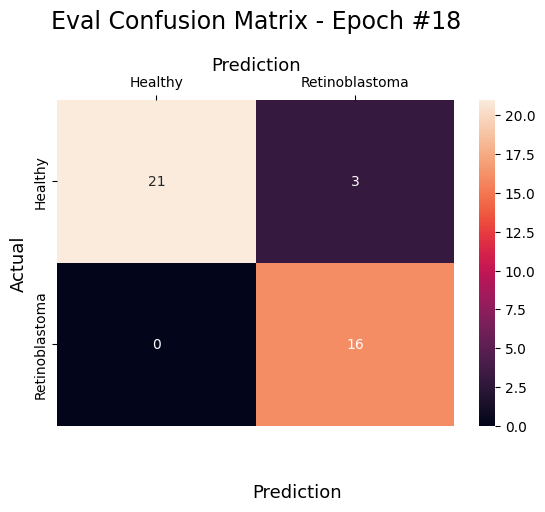

Epoch #19
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



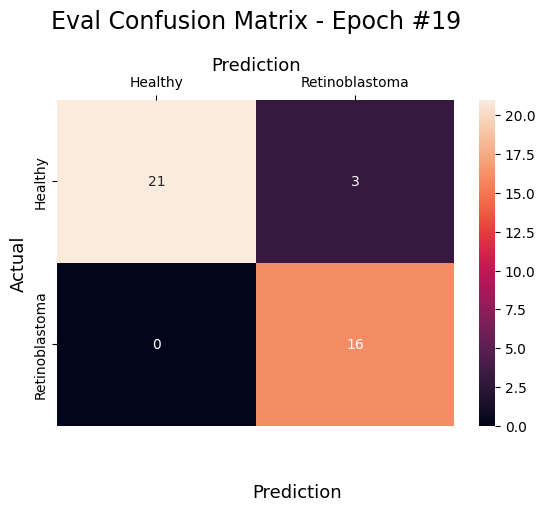

Epoch #20
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



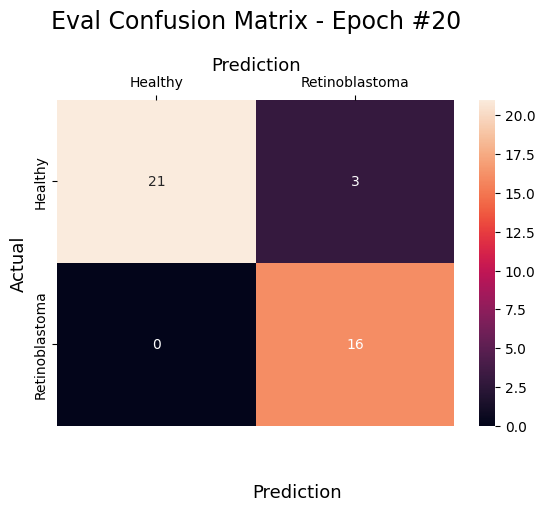

Epoch #21
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



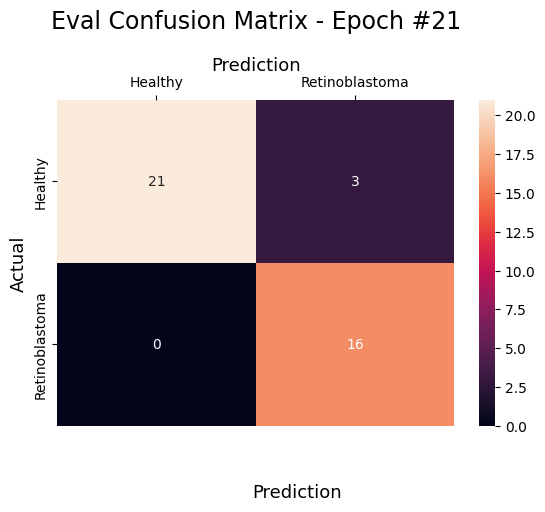

Epoch #22
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



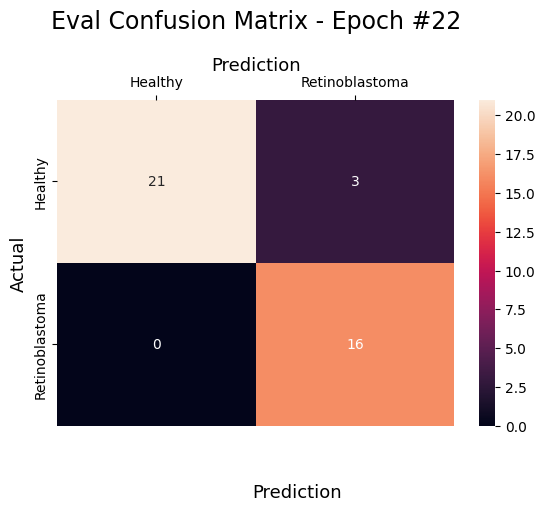

Epoch #23
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



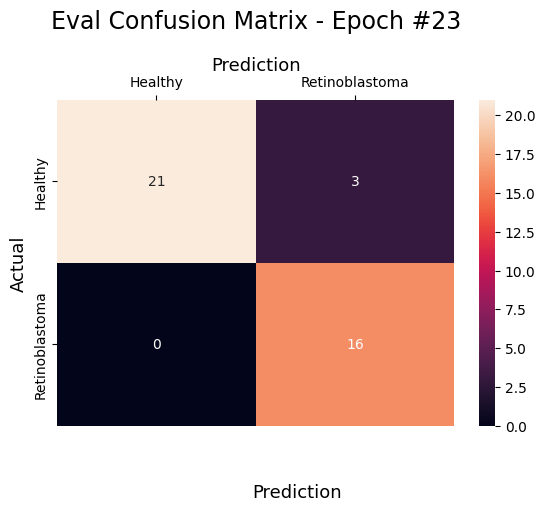

Epoch #24
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



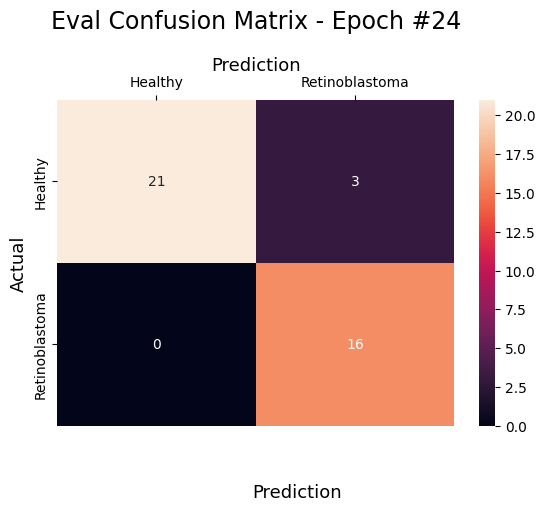

Epoch #25
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



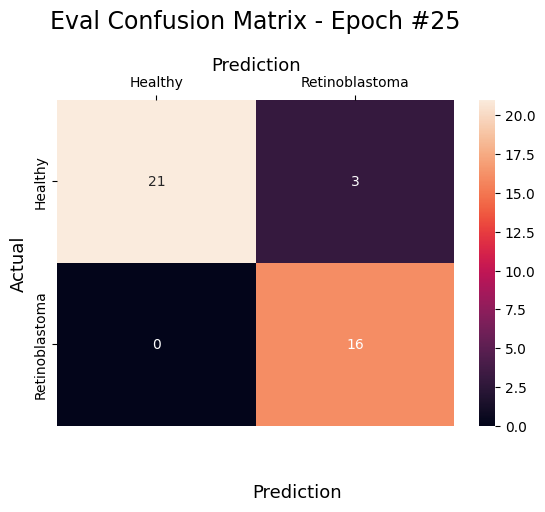

Epoch #26
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



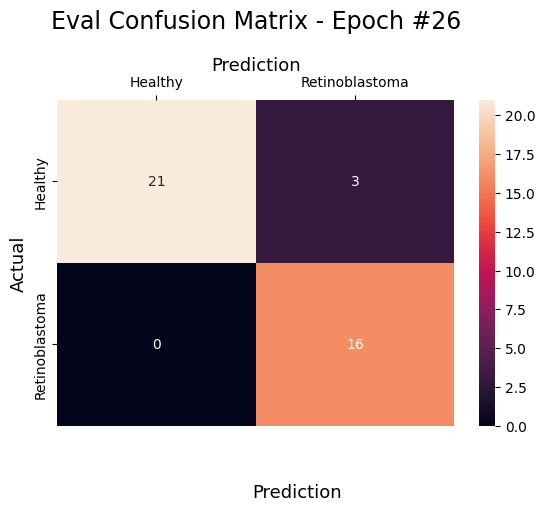

Epoch #27
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



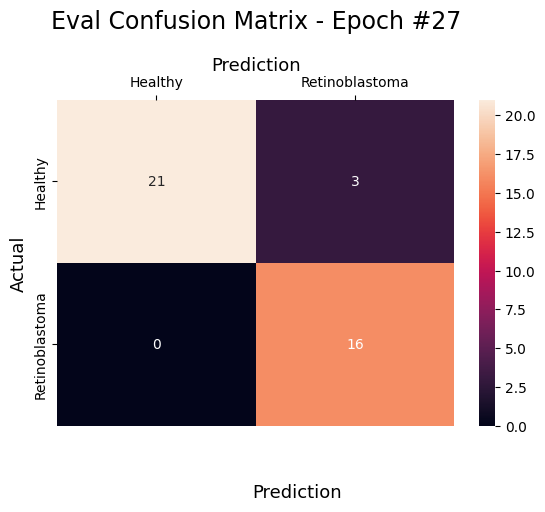

Epoch #28
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.80      1.00      0.89        16

    accuracy                           0.90        40
   macro avg       0.90      0.92      0.90        40
weighted avg       0.92      0.90      0.90        40



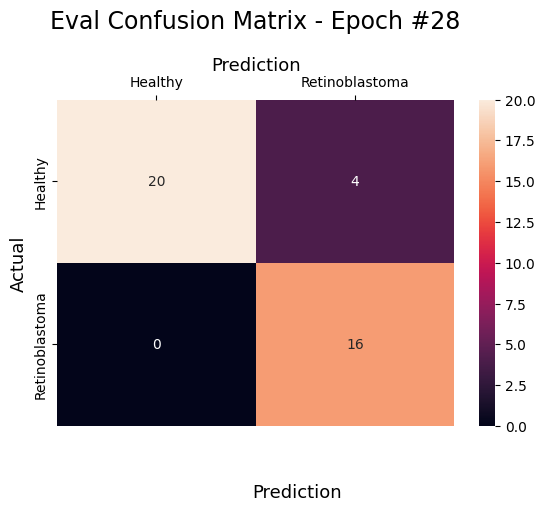

Epoch #29
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



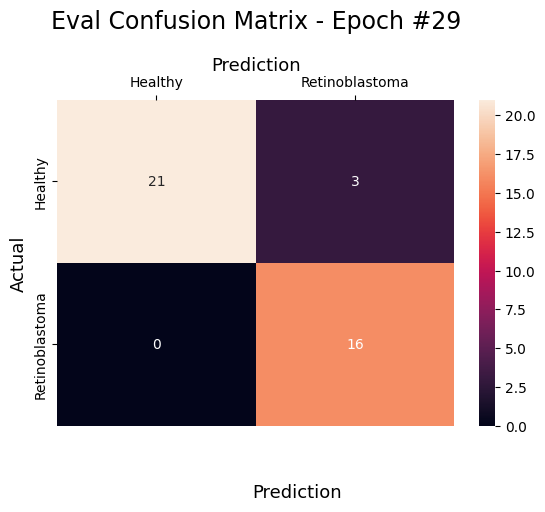

Epoch #30
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



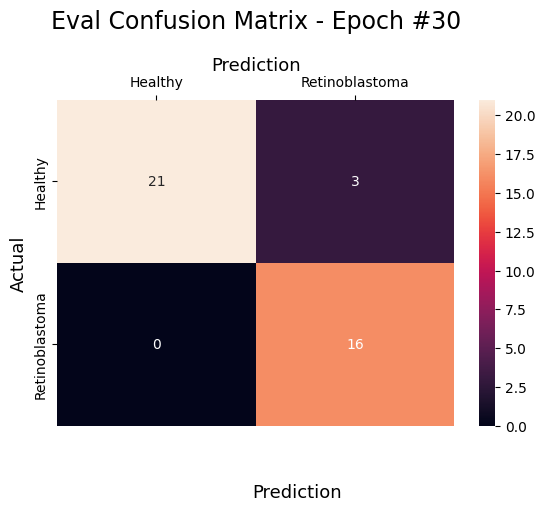

Epoch #31
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



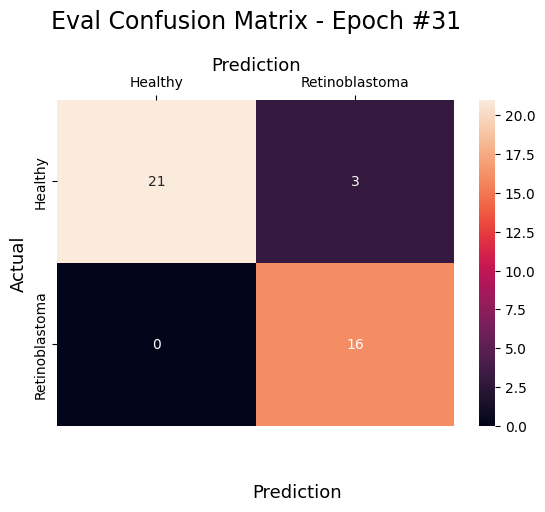

Epoch #32
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



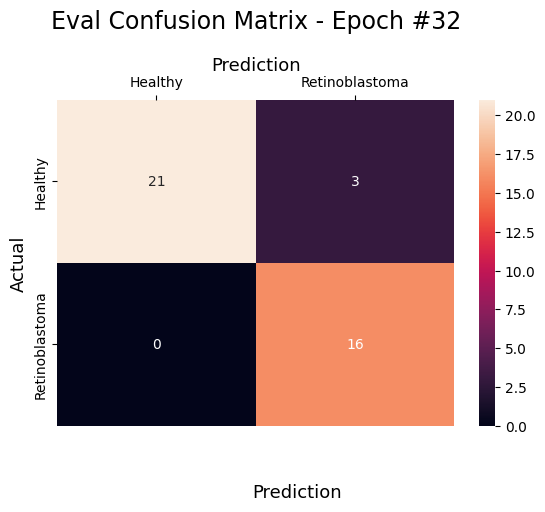

Epoch #33
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



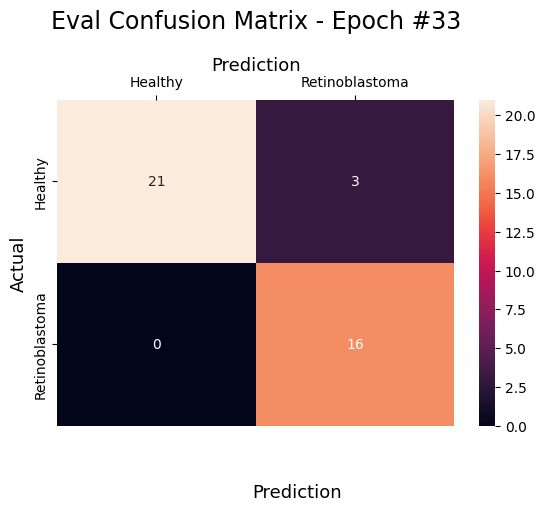

Epoch #34
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



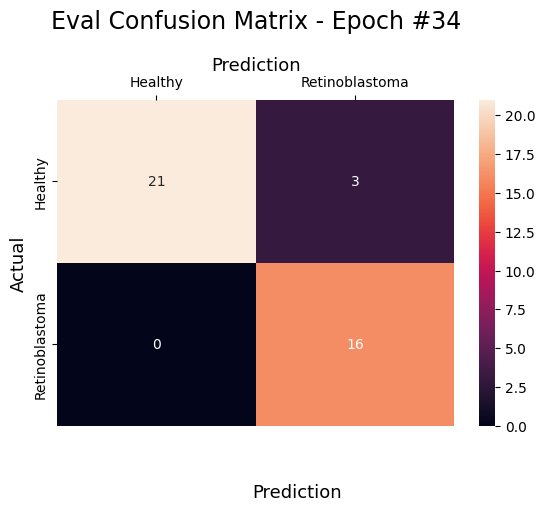

Epoch #35
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



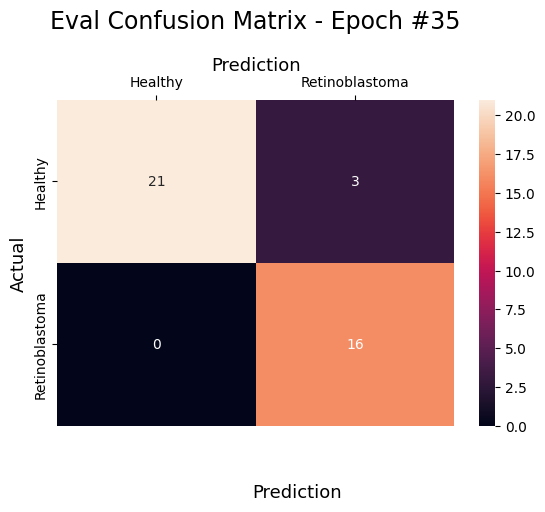

Epoch #36
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



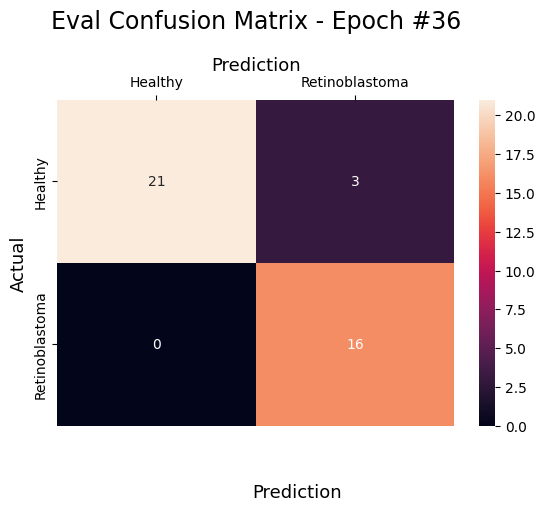

Epoch #37
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



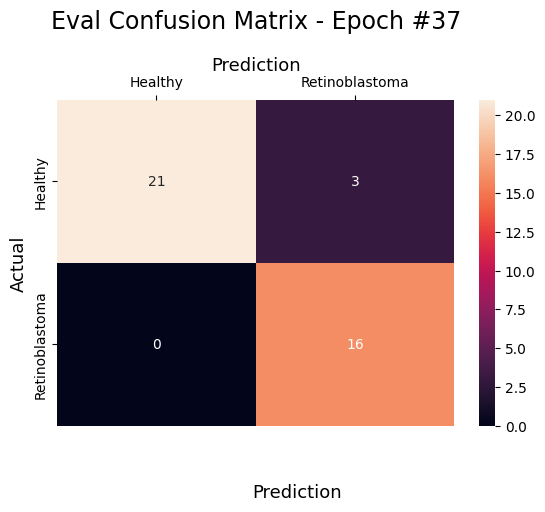

Epoch #38
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



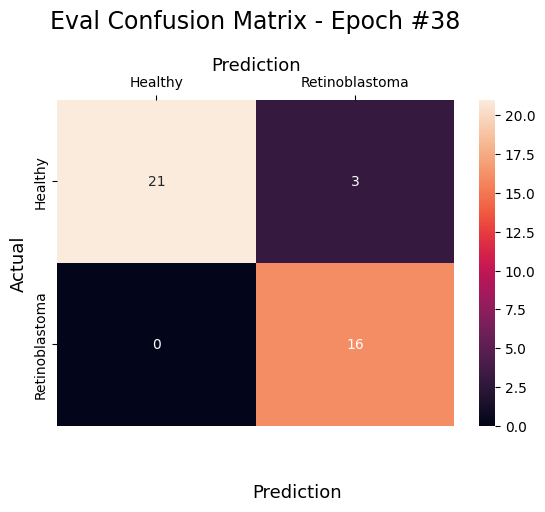

Epoch #39
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



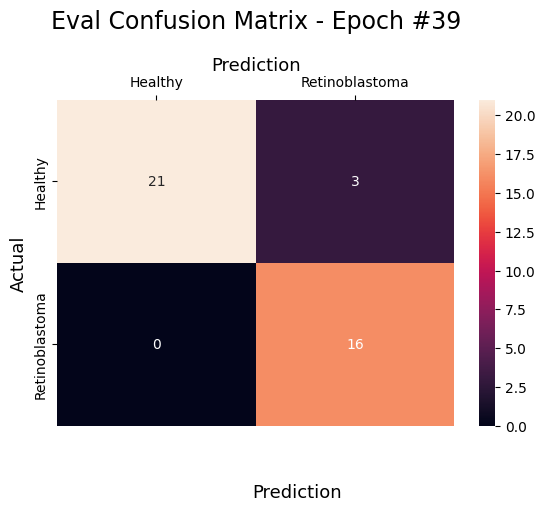

Epoch #40
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



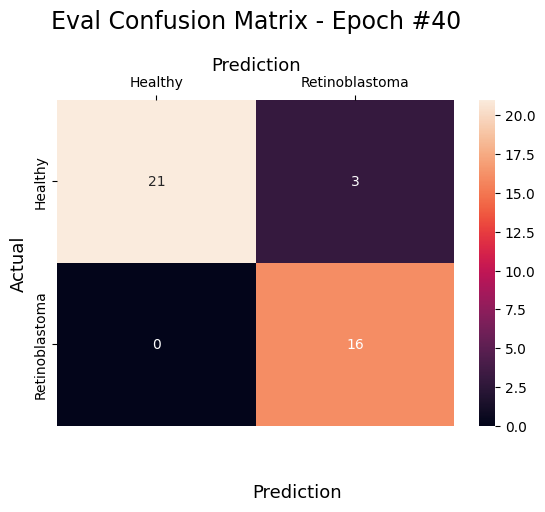

Epoch #41
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



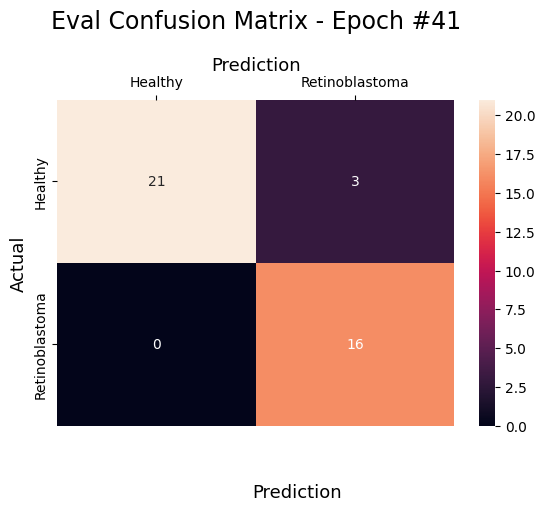

Epoch #42
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



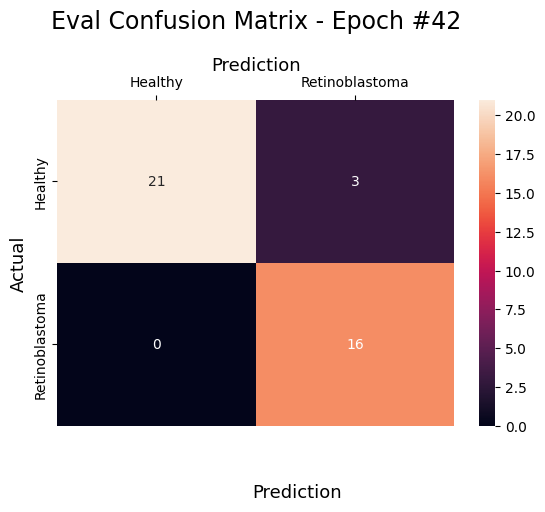

Epoch #43
Training: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       168

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



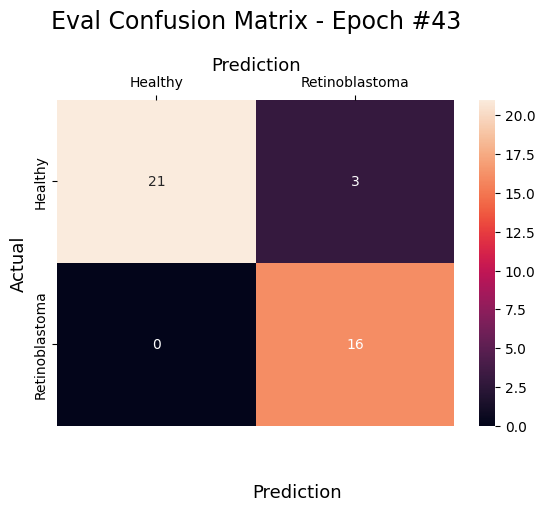

Epoch #44


KeyboardInterrupt: 

In [14]:
num_epochs = 150

for i in range(num_epochs):
    
    
    epoch_message = f"Epoch #{i+1}"
    print(epoch_message)
    f.write(epoch_message + "\n")
    
    train_actual, train_predicted = model_train(model, optimizer, criterion, train_loader)
    eval_actual, eval_predicted = model_eval(model, test_loader)
    
    train_report = classification_report(train_actual, train_predicted, output_dict=True)
    train_report_message = "Training: \n" + str(classification_report(train_actual, train_predicted, zero_division=0))
    print(train_report_message)
    f.write(train_report_message + "\n")
    
    eval_report = classification_report(eval_actual, eval_predicted, output_dict=True)
    eval_report_message = "Evaluation: \n" + str(classification_report(eval_actual, eval_predicted, zero_division=0))
    print(eval_report_message)
    f.write(eval_report_message + "\n")
    
    create_confusion_matrix(eval_actual, eval_predicted, i)


Validation: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40



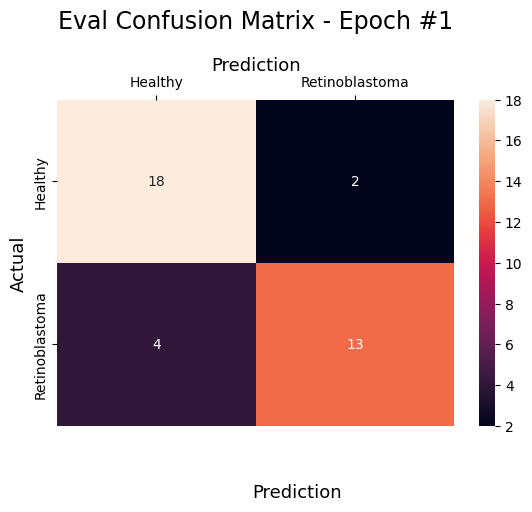

In [15]:
validation_actual, validation_predicted = model_eval(model, val_loader)

validation_report = classification_report(validation_actual, validation_predicted, output_dict=True)
validation_report_message = "Validation: \n" + str(classification_report(eval_actual, eval_predicted, zero_division=0))
f.write(validation_report_message + "\n")
print(validation_report_message)
    
create_confusion_matrix(validation_actual, validation_predicted, 0)
f.close() 

In [ ]:
torch.save(model.state_dict(), "../info/models/cancer/" + model_name + ".pth")

In [ ]:
# model.eval()

# # Create a dummy input tensor (shape: [batch_size, channels, height, width])
# dummy_input = torch.randn(1, 1, 128, 128)  # Adjust channels for your data
# dummy_input = dummy_input.to(device)
# # Export the model
# torch.onnx.export(
#     model,                     # your model
#     dummy_input,               # a dummy input tensor
#     "eye_disease_model.onnx",  # output file name
#     opset_version=11,          # ONNX version
#     input_names=['input'],     # optional
#     output_names=['output'],   # optional
#     dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}  # for flexibility
# )

# print("✅ Model exported to ONNX!")

✅ Model exported to ONNX!
